In [13]:
import skimage
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

1. 3 x 3 크기의 median filter를 구현하고 첨부된 pepper and salt noise가 있는 gray level image에 적용하세요. 그리고 원본 image와 filtering된 image를 비교할 수 있도록 그림으로 나타내세요. (median filter 코드와 비교 영상 제출)

In [14]:
def convolve(image, kernel, scale=1):
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]

	pad = (kW - 1)//2                                   #패딩
	output = np.zeros((iH-2*pad, iW-2*pad), dtype="float32")

	# loop over the input image, "sliding" the kernel across each (x, y)-coordinate from left-to-right and top to bottom
	for y in np.arange(pad, iH - pad):
		for x in np.arange(pad, iW - pad):
			roi = image[y-pad:y+pad+1, x-pad:x+pad+1]
			output[y-pad, x-pad] = (roi * kernel).sum()*scale
			
	# rescale the output image to be in the range [0, 255]
	#output = rescale_intensity(output, in_range=(0, 255))
	#output = (output * 255).astype("uint8")
 
	# return the output image
	return output

Pepper and Salt noise Image

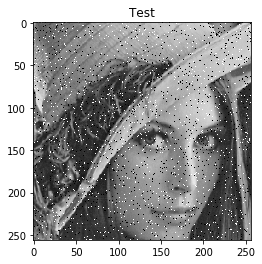

In [15]:
img = io.imread('sNp_image.png')
plt.imshow(img, cmap=plt.cm.gray)
plt.title("Test")
plt.show()

3*3 Median Filter 적용

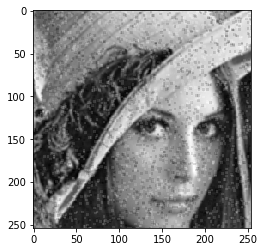

In [31]:
Median = np.array((
    [1,1,1],
	[1,1,1],
	[1,1,1]), dtype="int")
filtered = convolve(img, Median, scale=1/9)
plt.imshow(filtered, cmap=plt.cm.gray)

2. 3 x 3 크기의 Laplacian filter를 구현하고 gray level image "camera man"에 적용하여 edge를 detection하세요. edge 만을 뽑아낸 image를 잘 보이도록 후처리하여 하세요. (관련 code와 filter된 영상 제출)

Camera Man image

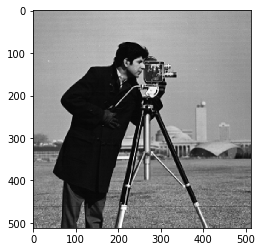

In [23]:
cameraman = io.imread('my_camera.png')
plt.imshow(cameraman, cmap=plt.cm.gray)
plt.show()

3*3 Laplacian of Gaussian Filter

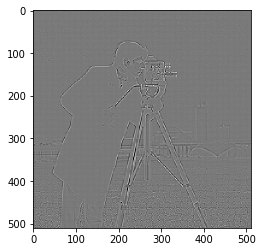

In [32]:
Laplacian = np.array((
[0,1,0],
[1,-4,1],
[0,1,0]))
filtered = convolve(cameraman, Laplacian, scale=1/9)
plt.imshow(filtered, cmap=plt.cm.gray)